In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob # for combining csvs

In [263]:
data_files = glob.glob('./data/*.csv')

The data is presented in seperate csv files for each year. I already started the filtering process by only grabbing data from 2000 onwards.  This is because I only want to look at more modern tennis.

In [264]:
df = pd.concat(
  (pd.read_csv(filename) for filename in data_files), 
  ignore_index=True
)

df
df_raw = df

## Preprocessing and EDA

For this section I will look to process and filter the data, and then look to perform some EDA on it.

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73247 entries, 0 to 73246
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          73247 non-null  object 
 1   tourney_name        73247 non-null  object 
 2   surface             73194 non-null  object 
 3   draw_size           73247 non-null  int64  
 4   tourney_level       73247 non-null  object 
 5   tourney_date        73247 non-null  int64  
 6   match_num           73247 non-null  int64  
 7   winner_id           73247 non-null  int64  
 8   winner_seed         30444 non-null  object 
 9   winner_entry        9229 non-null   object 
 10  winner_name         73247 non-null  object 
 11  winner_hand         73240 non-null  object 
 12  winner_ht           71351 non-null  float64
 13  winner_ioc          73247 non-null  object 
 14  winner_age          73240 non-null  float64
 15  loser_id            73247 non-null  int64  
 16  lose

In [266]:
df = df.sort_values(by='tourney_date')
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
67565,2000-339,Adelaide,Hard,32,A,20000103,7,102872,NaN,NaN,James Sekulov,R,180.0,AUS,23.2,101150,NaN,NaN,Gianluca Pozzi,L,180.0,ITA,34.5,6-4 2-6 6-2,3,R32,89.0,2.0,3.0,74.0,50.0,32.0,14.0,13.0,3.0,6.0,8.0,5.0,64.0,26.0,22.0,17.0,13.0,2.0,6.0,144.0,325.0,94.0,502.0
69919,2000-891,Chennai,Hard,32,A,20000103,4,101086,7.0,NaN,Ronald Agenor,R,180.0,USA,35.1,104156,NaN,WC,Sunil Kumar,R,NaN,IND,16.7,6-4 6-4,3,R32,82.0,3.0,0.0,64.0,35.0,26.0,19.0,10.0,2.0,3.0,2.0,3.0,62.0,32.0,22.0,16.0,10.0,1.0,4.0,96.0,492.0,1199.0,3.0
69918,2000-891,Chennai,Hard,32,A,20000103,3,210013,NaN,NaN,Martin Damm Sr,R,188.0,CZE,27.4,103294,NaN,NaN,Christophe Rochus,R,170.0,BEL,21.0,6-3 6-0,3,R32,50.0,7.0,0.0,46.0,26.0,23.0,12.0,8.0,1.0,1.0,1.0,1.0,37.0,17.0,8.0,9.0,7.0,1.0,5.0,NaN,NaN,121.0,385.0
69917,2000-891,Chennai,Hard,32,A,20000103,2,102455,NaN,NaN,Lorenzo Manta,R,190.0,SUI,25.2,102720,NaN,NaN,Tomas Zib,R,178.0,CZE,23.9,7-5 6-2,3,R32,80.0,10.0,1.0,69.0,42.0,31.0,16.0,10.0,4.0,4.0,4.0,2.0,70.0,50.0,31.0,9.0,10.0,5.0,8.0,115.0,399.0,111.0,408.0
67588,2000-339,Adelaide,Hard,32,A,20000103,30,103720,6.0,NaN,Lleyton Hewitt,R,180.0,AUS,18.8,102765,8.0,NaN,Nicolas Escude,R,185.0,FRA,23.7,3-6 6-1 6-4,3,SF,115.0,4.0,1.0,82.0,40.0,26.0,27.0,13.0,3.0,5.0,10.0,4.0,81.0,36.0,27.0,19.0,13.0,0.0,4.0,25.0,1429.0,37.0,995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103,2024-7694,Lyon,Clay,32,A,20240520,276,208659,NaN,WC,Giovanni Mpetshi Perricard,R,NaN,FRA,20.8,132283,NaN,NaN,Lorenzo Sonego,R,191.0,ITA,29.0,6-3 6-4,3,R32,79.0,8.0,0.0,50.0,34.0,28.0,12.0,10.0,0.0,0.0,2.0,3.0,53.0,37.0,28.0,7.0,9.0,2.0,4.0,117.0,541.0,50.0,991.0
4090,2024-7694,Lyon,Clay,32,A,20240520,291,209260,NaN,NaN,Luciano Darderi,R,NaN,ITA,22.2,105173,3,NaN,Adrian Mannarino,L,183.0,FRA,35.8,7-6(4) 6-3,3,R16,120.0,3.0,0.0,69.0,53.0,40.0,8.0,11.0,2.0,4.0,6.0,0.0,81.0,47.0,33.0,13.0,10.0,9.0,12.0,47.0,1002.0,22.0,1865.0
4088,2024-7694,Lyon,Clay,32,A,20240520,293,136440,NaN,NaN,Dominik Koepfer,L,180.0,GER,30.0,200005,1,NaN,Ugo Humbert,L,188.0,FRA,25.9,2-6 6-4 6-4,3,R16,124.0,6.0,2.0,76.0,54.0,34.0,11.0,14.0,5.0,9.0,2.0,2.0,93.0,62.0,41.0,13.0,14.0,1.0,5.0,67.0,767.0,17.0,2285.0
4102,2024-7694,Lyon,Clay,32,A,20240520,277,106415,NaN,NaN,Yoshihito Nishioka,L,170.0,JPN,28.6,110751,NaN,LL,Sebastian Fanselow,U,NaN,GER,32.3,6-0 6-1,3,R32,62.0,0.0,0.0,37.0,25.0,19.0,11.0,7.0,1.0,1.0,1.0,3.0,49.0,27.0,15.0,6.0,6.0,6.0,11.0,72.0,741.0,316.0,166.0


Already it's clear that there are many columns that are data type "object" for which I will have to turn into numeric, or drop. For many columns I am also seeing a lot of nulls. Let's look into these columns, and if I want to keep them then I will simply drop the null values if there aren't that many.

In [267]:
df.shape

(73247, 49)

In [268]:
df.drop_duplicates(inplace=True)

In [269]:
df.shape # no duplicates

(73247, 49)

In [270]:
# checking for nulls
df.isna().sum(axis=0).sort_values(ascending=False)

winner_entry          64018
loser_entry           58240
loser_seed            56389
winner_seed           42803
minutes                7938
l_1stIn                6469
l_svpt                 6469
l_ace                  6469
l_df                   6469
w_1stWon               6469
w_ace                  6469
w_df                   6469
w_svpt                 6469
w_2ndWon               6469
w_1stIn                6469
l_1stWon               6469
l_2ndWon               6469
l_bpFaced              6469
l_bpSaved              6469
w_bpFaced              6469
w_bpSaved              6469
w_SvGms                6468
l_SvGms                6468
loser_ht               3621
winner_ht              1896
loser_rank             1453
loser_rank_points      1453
winner_rank             566
winner_rank_points      566
surface                  53
loser_hand               42
loser_age                12
winner_age                7
winner_hand               7
winner_ioc                0
loser_id            

In [271]:
missing_stats = df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]
missing_stats

winner_entry          0.874002
loser_entry           0.795118
loser_seed            0.769847
winner_seed           0.584365
minutes               0.108373
l_1stIn               0.088318
l_svpt                0.088318
l_ace                 0.088318
l_df                  0.088318
w_1stWon              0.088318
w_ace                 0.088318
w_df                  0.088318
w_svpt                0.088318
w_2ndWon              0.088318
w_1stIn               0.088318
l_1stWon              0.088318
l_2ndWon              0.088318
l_bpFaced             0.088318
l_bpSaved             0.088318
w_bpFaced             0.088318
w_bpSaved             0.088318
w_SvGms               0.088304
l_SvGms               0.088304
loser_ht              0.049435
winner_ht             0.025885
loser_rank            0.019837
loser_rank_points     0.019837
winner_rank           0.007727
winner_rank_points    0.007727
surface               0.000724
loser_hand            0.000573
loser_age             0.000164
winner_a

Winner entry and loser entry are expected to be high. Those columns are there to indicate if a player has come from the qualifications for the tournament or is a wildcard.  This is generally not the case. For now I don't think that those columns are needed, so I am going to go ahead and drop them. I am also going to drop `winner_seed` and `loser_seed` because both those columns are redundant since we have the ranking of the winner and loser too.

In [272]:
df.drop(columns=['winner_entry', 'loser_entry', 'loser_seed', 'winner_seed'], inplace=True)

In [273]:
missing_stats = df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]
missing_stats

minutes               0.108373
l_1stIn               0.088318
l_svpt                0.088318
l_1stWon              0.088318
l_df                  0.088318
l_bpFaced             0.088318
w_1stWon              0.088318
w_df                  0.088318
w_ace                 0.088318
w_2ndWon              0.088318
w_1stIn               0.088318
w_svpt                0.088318
l_2ndWon              0.088318
l_bpSaved             0.088318
l_ace                 0.088318
w_bpFaced             0.088318
w_bpSaved             0.088318
l_SvGms               0.088304
w_SvGms               0.088304
loser_ht              0.049435
winner_ht             0.025885
loser_rank_points     0.019837
loser_rank            0.019837
winner_rank_points    0.007727
winner_rank           0.007727
surface               0.000724
loser_hand            0.000573
loser_age             0.000164
winner_hand           0.000096
winner_age            0.000096
winner_ioc            0.000000
winner_id             0.000000
winner_n

The next group of numbers all into stats about the match that was played.  These numbers are not helpful to be worked with because they're happening after the match has already started. For now I am going to drop these numbers, but I may return to them if I want to look at previous match stats as predictors.

In [274]:
df.drop(columns=['minutes','w_ace','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced','l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms','l_bpSaved','l_bpFaced'], inplace=True)

In [275]:
missing_stats = df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]
missing_stats

loser_ht              0.049435
winner_ht             0.025885
loser_rank            0.019837
loser_rank_points     0.019837
winner_rank           0.007727
winner_rank_points    0.007727
surface               0.000724
loser_hand            0.000573
loser_age             0.000164
winner_hand           0.000096
winner_age            0.000096
winner_id             0.000000
match_num             0.000000
tourney_date          0.000000
draw_size             0.000000
tourney_level         0.000000
tourney_id            0.000000
tourney_name          0.000000
winner_name           0.000000
loser_name            0.000000
winner_ioc            0.000000
loser_id              0.000000
loser_ioc             0.000000
round                 0.000000
score                 0.000000
best_of               0.000000
dtype: float64

For the height columns I'm going to just filter out the null values because they're a small subset of the data.

In [276]:
df.dropna(subset=['loser_ht', 'winner_ht'], inplace=True)

In [278]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

loser_rank            0.003831
loser_rank_points     0.003831
winner_rank           0.001234
winner_rank_points    0.001234
surface               0.000044
loser_hand            0.000029
winner_hand           0.000015
tourney_name          0.000000
tourney_level         0.000000
tourney_id            0.000000
winner_name           0.000000
winner_id             0.000000
match_num             0.000000
tourney_date          0.000000
draw_size             0.000000
winner_ht             0.000000
winner_age            0.000000
winner_ioc            0.000000
loser_ioc             0.000000
loser_ht              0.000000
loser_name            0.000000
loser_id              0.000000
round                 0.000000
best_of               0.000000
score                 0.000000
loser_age             0.000000
dtype: float64

For the next 4 rows I want to completely drop the columns `_rank_points` and just filter the nulls out of the rank columns.

In [279]:
df.drop(columns=['loser_rank_points', 'winner_rank_points'], inplace=True)

In [280]:
df.dropna(subset=['loser_rank', 'winner_rank'], inplace=True)

In [282]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

surface          0.000044
tourney_id       0.000000
tourney_name     0.000000
draw_size        0.000000
tourney_level    0.000000
tourney_date     0.000000
match_num        0.000000
winner_id        0.000000
winner_name      0.000000
winner_hand      0.000000
winner_ht        0.000000
winner_ioc       0.000000
winner_age       0.000000
loser_id         0.000000
loser_name       0.000000
loser_hand       0.000000
loser_ht         0.000000
loser_ioc        0.000000
loser_age        0.000000
score            0.000000
best_of          0.000000
round            0.000000
winner_rank      0.000000
loser_rank       0.000000
dtype: float64

There are several others columns here like `surface` that I want to delve a little more deeply into. For instance to see if someone is a clay court specialist or is a grass court specialist.  However for now I'm going to leave that column out of my analysis. I will also take out a couple other columns that are not worth including for now. 

In [284]:
df.drop(columns=['round', 'surface', 'tourney_id', 'tourney_name', 'draw_size', 'tourney_date', 'match_num'], inplace=True)

KeyError: "['round', 'surface', 'tourney_id', 'tourney_name', 'draw_size', 'tourney_date', 'match_num'] not found in axis"

In [285]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

tourney_level    0.0
winner_id        0.0
winner_name      0.0
winner_hand      0.0
winner_ht        0.0
winner_ioc       0.0
winner_age       0.0
loser_id         0.0
loser_name       0.0
loser_hand       0.0
loser_ht         0.0
loser_ioc        0.0
loser_age        0.0
score            0.0
best_of          0.0
winner_rank      0.0
loser_rank       0.0
dtype: float64

Now that I don't have any nulls in my dataset, and I've removed many of the columns that aren't needed, I am also going to filter the data. The biggest change that I want to make is to only include high level professional tennis tournaments.  These tournaments are called Grand Slams, and Masters 1000s. Thankfully, these tournaments are easy to filter for in the dataset. If needed I can add other tournaments in at another time.

In [286]:
df['tourney_level'].value_counts()

tourney_level
A    38974
M    13564
G    12021
D     3605
F      397
Name: count, dtype: int64

In [287]:
tourney_fltr = ((df['tourney_level'] == 'M') | (df['tourney_level'] == 'G'))

df_filtered = df.loc[tourney_fltr, :]

In [288]:
df['tourney_level'].value_counts()

tourney_level
A    38974
M    13564
G    12021
D     3605
F      397
Name: count, dtype: int64

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68561 entries, 67565 to 4074
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tourney_level  68561 non-null  object 
 1   winner_id      68561 non-null  int64  
 2   winner_name    68561 non-null  object 
 3   winner_hand    68561 non-null  object 
 4   winner_ht      68561 non-null  float64
 5   winner_ioc     68561 non-null  object 
 6   winner_age     68561 non-null  float64
 7   loser_id       68561 non-null  int64  
 8   loser_name     68561 non-null  object 
 9   loser_hand     68561 non-null  object 
 10  loser_ht       68561 non-null  float64
 11  loser_ioc      68561 non-null  object 
 12  loser_age      68561 non-null  float64
 13  score          68561 non-null  object 
 14  best_of        68561 non-null  int64  
 15  winner_rank    68561 non-null  float64
 16  loser_rank     68561 non-null  float64
dtypes: float64(6), int64(3), object(8)
memory usage: 9.4

In [126]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25585 entries, 69611 to 4002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tourney_level  25585 non-null  object 
 1   winner_id      25585 non-null  int64  
 2   winner_name    25585 non-null  object 
 3   winner_hand    25585 non-null  object 
 4   winner_ht      25585 non-null  float64
 5   winner_ioc     25585 non-null  object 
 6   winner_age     25585 non-null  float64
 7   loser_id       25585 non-null  int64  
 8   loser_name     25585 non-null  object 
 9   loser_hand     25585 non-null  object 
 10  loser_ht       25585 non-null  float64
 11  loser_ioc      25585 non-null  object 
 12  loser_age      25585 non-null  float64
 13  score          25585 non-null  object 
 14  best_of        25585 non-null  int64  
 15  winner_rank    25585 non-null  float64
 16  loser_rank     25585 non-null  float64
dtypes: float64(6), int64(3), object(8)
memory usage: 3.5

Now that I've used the `tourney_level` column to filter the dataset I can go ahead and drop it. More than that I can actually go ahead and drop all non-numeric columns.

In [127]:
df_filtered = df_filtered.select_dtypes('number')

In [128]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25585 entries, 69611 to 4002
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winner_id    25585 non-null  int64  
 1   winner_ht    25585 non-null  float64
 2   winner_age   25585 non-null  float64
 3   loser_id     25585 non-null  int64  
 4   loser_ht     25585 non-null  float64
 5   loser_age    25585 non-null  float64
 6   best_of      25585 non-null  int64  
 7   winner_rank  25585 non-null  float64
 8   loser_rank   25585 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 2.0 MB


Lastly I want to drop the `_id` columns because they are identifiers.

In [129]:
df_filtered.drop(columns=['winner_id', 'loser_id'], inplace=True)

In [130]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25585 entries, 69611 to 4002
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winner_ht    25585 non-null  float64
 1   winner_age   25585 non-null  float64
 2   loser_ht     25585 non-null  float64
 3   loser_age    25585 non-null  float64
 4   best_of      25585 non-null  int64  
 5   winner_rank  25585 non-null  float64
 6   loser_rank   25585 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.6 MB


In [133]:
df_filtered

,winner_ht,winner_age,loser_ht,loser_age,best_of,winner_rank,loser_rank
69611,175.0,26.2,193.0,22.8,5,41.0,123.0
69629,173.0,22.0,188.0,23.4,5,54.0,7.0
69594,180.0,27.1,175.0,21.4,5,89.0,52.0
69595,193.0,28.3,193.0,21.8,5,29.0,257.0
69596,188.0,21.7,190.0,24.4,5,12.0,171.0
...,...,...,...,...,...,...,...
3965,185.0,26.9,196.0,27.2,3,16.0,9.0
3966,188.0,26.9,198.0,27.9,3,32.0,18.0
4015,196.0,24.8,185.0,24.1,3,28.0,61.0
4017,185.0,21.0,185.0,20.7,3,12.0,81.0


This is my final dataset for now. I know that there are not a lot of features, but I will look to create one more called `ranking_difference` after manipulating the data to have a target column.

In [136]:
suffix_to_append = ['_rank', '_ht', '_age']
final_df = pd.DataFrame(columns=list("HR" + ele for ele in suffix_to_append) + 
                            list("LR" + ele for ele in suffix_to_append)  + ['best_of'] + ["HR_win"],
                      index=df_filtered.index)

In [137]:
final_df

,HR_rank,HR_ht,HR_age,LR_rank,LR_ht,LR_age,best_of,HR_win
69611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
for index,row in df_filtered.iterrows():
    if row["winner_rank"] < row["loser_rank"]:

        final_df.loc[index,list("HR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("winner" + ele for ele in suffix_to_append)])
        final_df.loc[index,list("LR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("loser" + ele for ele in suffix_to_append)])
        final_df.loc[index,"HR_win"] = 1
        final_df.loc[index,"best_of"] = row['best_of']
    else:

        final_df.loc[index,list("LR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("winner" + ele for ele in suffix_to_append)])
        final_df.loc[index,list("HR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("loser" + ele for ele in suffix_to_append)])
        final_df.loc[index,"HR_win"] = 0
        final_df.loc[index,"best_of"] = row['best_of']

In [141]:
final_df

,HR_rank,HR_ht,HR_age,LR_rank,LR_ht,LR_age,best_of,HR_win
69611,41.0,175.0,26.2,123.0,193.0,22.8,5.0,1
69629,7.0,188.0,23.4,54.0,173.0,22.0,5.0,0
69594,52.0,175.0,21.4,89.0,180.0,27.1,5.0,0
69595,29.0,193.0,28.3,257.0,193.0,21.8,5.0,1
69596,12.0,188.0,21.7,171.0,190.0,24.4,5.0,1
...,...,...,...,...,...,...,...,...
3965,9.0,196.0,27.2,16.0,185.0,26.9,3.0,0
3966,18.0,198.0,27.9,32.0,188.0,26.9,3.0,0
4015,28.0,196.0,24.8,61.0,185.0,24.1,3.0,1
4017,12.0,185.0,21.0,81.0,185.0,20.7,3.0,1


In [255]:
final_df['ranking_difference'] = final_df['LR_rank'] - final_df['HR_rank']
final_df = final_df.astype('float')

That is the end of the preprocessing for now. All in all the data looks in good shape for a logistic regression. I will perform one, but first I need to do a little EDA.

### EDA

First I want to look at the class imbalance for `_rank`. This will also show how good a random guess for the higher ranked player will be. This number will be the number that I am looking to improve upon in my logistic regression.

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
final_df['HR_win'].sum() / final_df.shape[0]

0.6758647645104553

Ok so a simple model of just picking the higher ranked player would work about 68% of the time.  The other EDA I want to do on this dataset is to look at the distribution of my features.

In [258]:
final_df['HR_age'].mean()

26.172405706468634

In [259]:
final_df['LR_age'].mean()

26.086144225131914

Let's look at the distribution of age

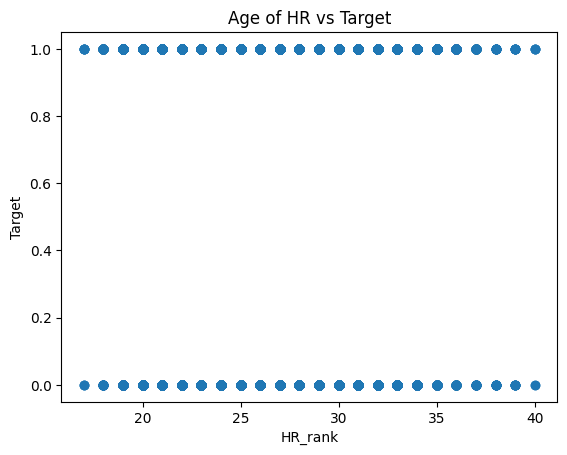

In [260]:
plt.scatter(final_df['HR_age'], final_df['HR_win'])
plt.xlabel('HR_rank')
plt.ylabel('Target')
plt.title('Age of HR vs Target')
plt.show()

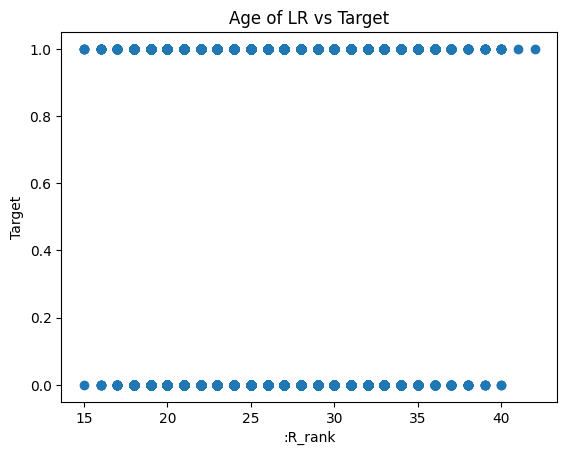

In [261]:
plt.scatter(final_df['LR_age'], final_df['HR_win'])
plt.xlabel(':R_rank')
plt.ylabel('Target')
plt.title('Age of LR vs Target')
plt.show()

### Modeling

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [251]:
final_df['HR_win'] = final_df['HR_win'].astype('int')
y = final_df['HR_win']
X = final_df.drop(columns=['HR_win'])
X = X.astype('int')
X.info()

X

<class 'pandas.core.frame.DataFrame'>
Index: 25585 entries, 69611 to 4002
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   HR_rank             25585 non-null  int64
 1   HR_ht               25585 non-null  int64
 2   HR_age              25585 non-null  int64
 3   LR_rank             25585 non-null  int64
 4   LR_ht               25585 non-null  int64
 5   LR_age              25585 non-null  int64
 6   best_of             25585 non-null  int64
 7   ranking_difference  25585 non-null  int64
dtypes: int64(8)
memory usage: 2.8 MB


,HR_rank,HR_ht,HR_age,LR_rank,LR_ht,LR_age,best_of,ranking_difference
69611,41,175,26,123,193,22,5,82
69629,7,188,23,54,173,22,5,47
69594,52,175,21,89,180,27,5,37
69595,29,193,28,257,193,21,5,228
69596,12,188,21,171,190,24,5,159
...,...,...,...,...,...,...,...,...
3965,9,196,27,16,185,26,3,7
3966,18,198,27,32,188,26,3,14
4015,28,196,24,61,185,24,3,33
4017,12,185,21,81,185,20,3,69


In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43, stratify=y)

In [253]:
# Fitting a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.6759954138002918
Test score: 0.6753165546349852


In [254]:
coefficients = logreg.coef_[0]
coefficients

array([-0.01039214,  0.00571844, -0.00962174, -0.00328891, -0.00646494,
        0.02288282,  0.18383129,  0.00710323])

In [210]:
feature_names = X_train.columns

coefficients = logreg.coef_[0]

for feat, coef in zip(feature_names, coefficients):
    print(f"feature: {feat}, coefficent: {coef}")

feature: HR_rank, coefficent: -0.01039361199744555
feature: HR_ht, coefficent: 0.005676824939563606
feature: HR_age, coefficent: -0.009619316823885192
feature: LR_rank, coefficent: -0.003288302042533883
feature: LR_ht, coefficent: -0.006513127199112801
feature: LR_age, coefficent: 0.02328283112038888
feature: best_of, coefficent: 0.1838436816775283
feature: ranking_difference, coefficent: 0.0071053099549192675


This score is roughly the same as random guessing.  Let's go ahead and scale the data and then run the logistic regression with the scaled data.

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

logreg_scaled = LogisticRegression(C=1)
logreg_scaled.fit(X_train_scaled, y_train)

coefficients = logreg_scaled.coef_[0]

In [218]:
print(f"Train score: {logreg_scaled.score(X_train, y_train)}")
print(f"Test score: {logreg_scaled.score(X_test, y_test)}")

Train score: 0.5833333333333334
Test score: 0.5854306706268564


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [219]:
feature_names = X_train.columns

coefficients = logreg_scaled.coef_[0]

for feat, coef in zip(feature_names, coefficients):
    print(f"feature: {feat}, coefficent: {coef}")

feature: HR_rank, coefficent: -0.4141852523120965
feature: HR_ht, coefficent: 0.020589909374701523
feature: HR_age, coefficent: -0.040601694746062185
feature: LR_rank, coefficent: 0.08383760652773269
feature: LR_ht, coefficent: -0.06273042997601848
feature: LR_age, coefficent: 0.09014853496098006
feature: best_of, coefficent: 0.18025399240591783
feature: ranking_difference, coefficent: 0.23366028766203506


Modeling was not great, and definitely hoped for better, but it is a good start, and now I will just look to add better features.

Let's work on creating my target variable first

### Presentation Code Snippets

#### Preprocessing Slide

In [42]:
some_data = np.random.randint(low=0,high=100,size=(1000,11))

In [43]:
mock_df_raw = pd.DataFrame(some_data,
                  index=list("match_{}".format(i) for i in range(some_data.shape[0])),
                  columns= list("WIN_feat{}".format(i) for i in range(5)) + 
                           list("LOS_feat{}".format(i) for i in range(5))  + ["NULL"])

mock_df_raw

,WIN_feat0,WIN_feat1,WIN_feat2,WIN_feat3,WIN_feat4,LOS_feat0,LOS_feat1,LOS_feat2,LOS_feat3,LOS_feat4,NULL
match_0,52,6,0,96,14,36,19,27,0,68,1
match_1,25,52,49,62,39,19,43,15,17,99,54
match_2,66,6,44,78,13,15,77,71,7,80,13
match_3,2,96,50,32,46,33,34,51,69,16,58
match_4,40,63,49,9,66,10,66,69,80,46,49
...,...,...,...,...,...,...,...,...,...,...,...
match_995,39,34,99,72,82,31,40,18,59,1,19
match_996,40,66,77,32,87,32,7,33,50,86,10
match_997,14,38,78,67,46,99,50,38,50,14,15
match_998,15,17,78,50,35,46,87,79,19,88,78


In [44]:
formatted_mock_df = pd.DataFrame(some_data, 
                      columns=list("HR_feat{}".format(i) for i in range(5)) + 
                      list("LR_feat{}".format(i) for i in range(5)) + ["HR_win"],
                      index=mock_df.index)
formatted_mock_df['HR_win'] = np.where(formatted_mock_df['HR_win'] > 50, 1, 0)

formatted_mock_df

,HR_feat0,HR_feat1,HR_feat2,HR_feat3,HR_feat4,LR_feat0,LR_feat1,LR_feat2,LR_feat3,LR_feat4,HR_win
match_0,52,6,0,96,14,36,19,27,0,68,0
match_1,25,52,49,62,39,19,43,15,17,99,1
match_2,66,6,44,78,13,15,77,71,7,80,0
match_3,2,96,50,32,46,33,34,51,69,16,1
match_4,40,63,49,9,66,10,66,69,80,46,0
...,...,...,...,...,...,...,...,...,...,...,...
match_995,39,34,99,72,82,31,40,18,59,1,0
match_996,40,66,77,32,87,32,7,33,50,86,0
match_997,14,38,78,67,46,99,50,38,50,14,0
match_998,15,17,78,50,35,46,87,79,19,88,1


In [73]:
pd.set_option('display.max_columns', 100)
df_raw

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,Kei Nishikori,R,178.0,JPN,29.0,106421,4.0,NaN,Daniil Medvedev,R,198.0,RUS,22.8,6-4 3-6 6-2,3,F,124.0,3.0,3.0,77.0,44.0,31.0,17.0,13.0,3.0,6.0,8.0,6.0,100.0,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,Daniil Medvedev,R,198.0,RUS,22.8,104542,NaN,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,7-6(6) 6-2,3,SF,82.0,10.0,1.0,52.0,33.0,28.0,14.0,10.0,0.0,1.0,17.0,2.0,77.0,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,Kei Nishikori,R,178.0,JPN,29.0,104871,NaN,NaN,Jeremy Chardy,R,188.0,FRA,31.8,6-2 6-2,3,SF,66.0,2.0,2.0,47.0,33.0,26.0,9.0,8.0,2.0,2.0,10.0,3.0,46.0,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,200282,7.0,NaN,Alex De Minaur,R,183.0,AUS,19.8,6-4 7-6(2),3,QF,106.0,12.0,2.0,68.0,43.0,34.0,15.0,11.0,4.0,5.0,1.0,2.0,81.0,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,Daniil Medvedev,R,198.0,RUS,22.8,105683,5.0,NaN,Milos Raonic,R,196.0,CAN,28.0,6-7(2) 6-3 6-4,3,QF,129.0,12.0,3.0,105.0,68.0,48.0,25.0,16.0,8.0,8.0,29.0,5.0,94.0,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73242,2014-605,Tour Finals,Hard,8,F,20141109,514,104925,1.0,NaN,Novak Djokovic,R,188.0,SRB,27.4,105453,4.0,NaN,Kei Nishikori,R,178.0,JPN,24.8,6-1 3-6 6-0,3,SF,88.0,3.0,2.0,58.0,34.0,28.0,13.0,11.0,2.0,4.0,3.0,6.0,67.0,38.0,29.0,5.0,11.0,3.0,9.0,1.0,10010.0,5.0,4625.0
73243,2014-605,Tour Finals,Hard,8,F,20141109,515,104925,1.0,NaN,Novak Djokovic,R,188.0,SRB,27.4,103819,2.0,NaN,Roger Federer,R,185.0,SUI,33.2,W/O,3,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10010.0,2.0,8700.0
73244,2014-D015,Davis Cup WG F: FRA vs SUI,Clay,4,D,20141121,1,104527,NaN,NaN,Stan Wawrinka,R,183.0,SUI,29.6,104542,NaN,NaN,Jo-Wilfried Tsonga,R,188.0,FRA,29.5,6-1 3-6 6-3 6-2,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5295.0,12.0,2740.0
73245,2014-D015,Davis Cup WG F: FRA vs SUI,Clay,4,D,20141121,2,104792,NaN,NaN,Gael Monfils,R,193.0,FRA,28.2,103819,NaN,NaN,Roger Federer,R,185.0,SUI,33.2,6-1 6-4 6-3,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1825.0,2.0,9700.0


In [158]:
final_df

,HR_rank,HR_ht,HR_age,LR_rank,LR_ht,LR_age,best_of,HR_win,ranking_difference
69611,41.0,175.0,26.2,123.0,193.0,22.8,5.0,1,82.0
69629,7.0,188.0,23.4,54.0,173.0,22.0,5.0,0,47.0
69594,52.0,175.0,21.4,89.0,180.0,27.1,5.0,0,37.0
69595,29.0,193.0,28.3,257.0,193.0,21.8,5.0,1,228.0
69596,12.0,188.0,21.7,171.0,190.0,24.4,5.0,1,159.0
...,...,...,...,...,...,...,...,...,...
3965,9.0,196.0,27.2,16.0,185.0,26.9,3.0,0,7.0
3966,18.0,198.0,27.9,32.0,188.0,26.9,3.0,0,14.0
4015,28.0,196.0,24.8,61.0,185.0,24.1,3.0,1,33.0
4017,12.0,185.0,21.0,81.0,185.0,20.7,3.0,1,69.0


#### EDA Slide

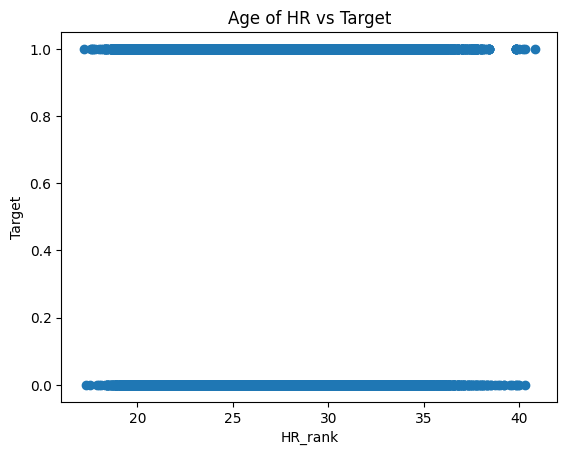

In [230]:
plt.scatter(final_df['HR_age'], final_df['HR_win'])
plt.xlabel('HR_rank')
plt.ylabel('Target')
plt.title('Age of HR vs Target')
plt.show()

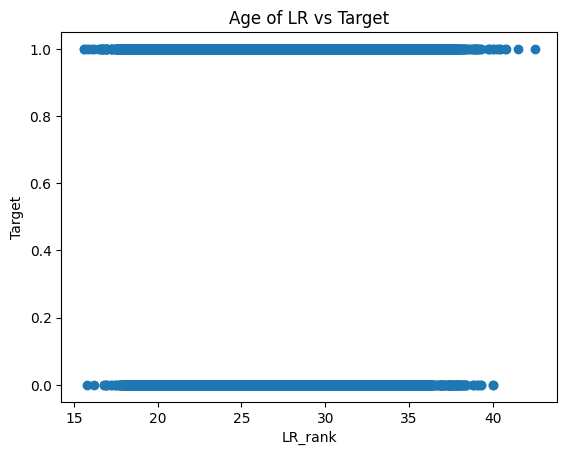

In [233]:
plt.scatter(final_df['LR_age'], final_df['HR_win'])
plt.xlabel('LR_rank')
plt.ylabel('Target')
plt.title('Age of LR vs Target')
plt.show()

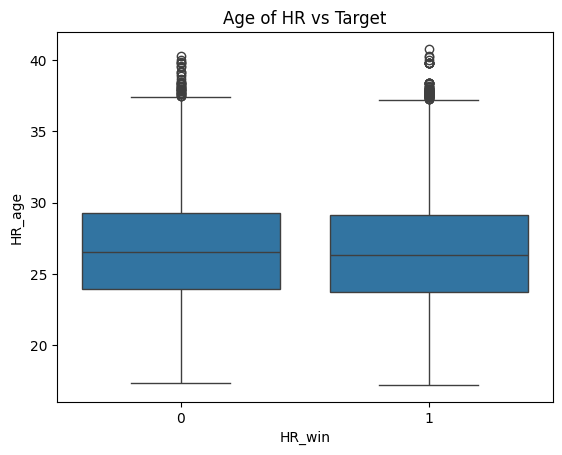

In [232]:
sns.boxplot(x='HR_win', y='HR_age', data=final_df)
plt.xlabel('HR_win')
plt.ylabel('HR_age')
plt.title('Age of HR vs Target')
plt.show()

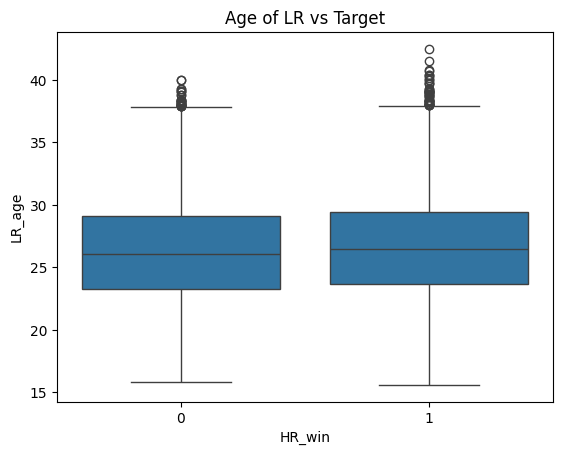

In [228]:
sns.boxplot(x='HR_win', y='LR_age', data=final_df)
plt.xlabel('HR_win')
plt.ylabel('LR_age')
plt.title('Age of LR vs Target')
plt.show()